# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import random
import pickle
import csv
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.contrib.layers import flatten


# Visualizations will be shown in the notebook.
%matplotlib inline


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### Read & prepare data

In [2]:
def read_labels(labels_csv):
    signnames = open(labels_csv)
    reader = csv.DictReader(signnames, delimiter=',')
    LabelsList = {}
    for line in reader:
        LabelsList[line["ClassId"]] = line["SignName"]
        #print(line["ClassId"], ': ', line["SignName"])
    
    return LabelsList

TrafficLabels = read_labels("signnames.csv")

for n in range(len(TrafficLabels)):
    Label = str(n)
    print("Label %2d: %s" %(n, TrafficLabels[Label]))


Label  0: Speed limit (20km/h)
Label  1: Speed limit (30km/h)
Label  2: Speed limit (50km/h)
Label  3: Speed limit (60km/h)
Label  4: Speed limit (70km/h)
Label  5: Speed limit (80km/h)
Label  6: End of speed limit (80km/h)
Label  7: Speed limit (100km/h)
Label  8: Speed limit (120km/h)
Label  9: No passing
Label 10: No passing for vehicles over 3.5 metric tons
Label 11: Right-of-way at the next intersection
Label 12: Priority road
Label 13: Yield
Label 14: Stop
Label 15: No vehicles
Label 16: Vehicles over 3.5 metric tons prohibited
Label 17: No entry
Label 18: General caution
Label 19: Dangerous curve to the left
Label 20: Dangerous curve to the right
Label 21: Double curve
Label 22: Bumpy road
Label 23: Slippery road
Label 24: Road narrows on the right
Label 25: Road work
Label 26: Traffic signals
Label 27: Pedestrians
Label 28: Children crossing
Label 29: Bicycles crossing
Label 30: Beware of ice/snow
Label 31: Wild animals crossing
Label 32: End of all speed and passing limits
Lab

In [3]:
# TODO: Fill this in based on where you saved the training and testing data

data_path = './traffic-signs-data/'

training_file = data_path + 'train.p'
validation_file = data_path + 'valid.p'
testing_file = data_path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [4]:
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

image_shape = X_train[0].shape

print()
print("Image Shape: {}".format(image_shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))



Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.amax(y_test) - np.amin(y_test) + 1

print("Dataset summary:")
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Dataset summary:
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

The first 6 images of all classes:


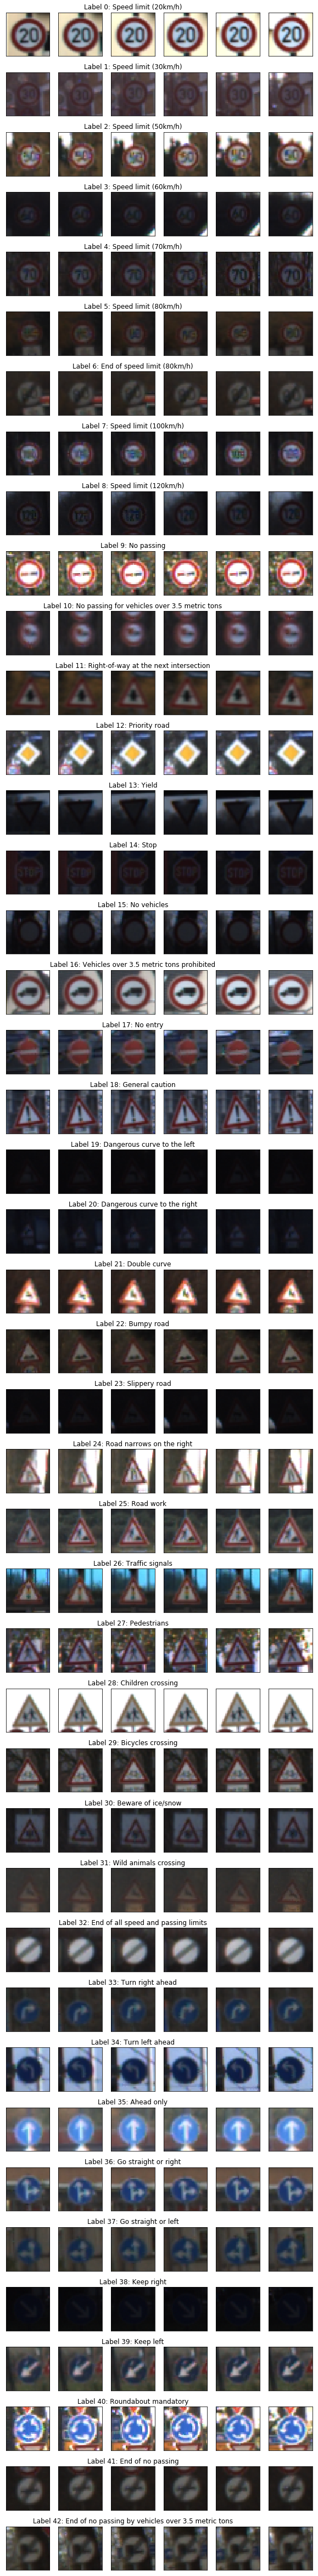

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

def show_signs():
    
    num_signs = 6
    print('The first 6 images of all classes:')
    
    for ind in range(n_classes):
        label_index = ind
        sign_label = TrafficLabels[ str(label_index) ]

        #print('Label ', label_index, ': ', sign_label, ' (the first 10 images)')

        fig = plt.figure(1, figsize=(10,86))

        images_count = 0
        for n in range(n_train):
            if y_train[n] == label_index:
                image = X_train[n].squeeze()
                #plt.figure(label_index + 1)
                plt.subplot(n_classes,num_signs, ind*num_signs+images_count+1)
                plt.imshow(image, cmap="gray")
                plt.xticks([])
                plt.yticks([])
                #plt.pause(1)

                images_count += 1

                if images_count == num_signs:
                    break

                if images_count == num_signs // 2:
                    plt.title('Label ' + str(label_index) + ': ' + sign_label)
                

#image_index = random.randint(0, len(X_train))
show_signs()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

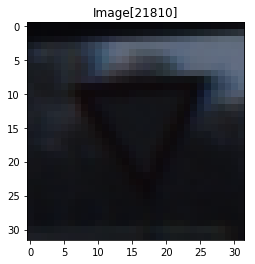

Train_image[21810] preparing demo

Before normalization:
---------------------
Image type: <uint8>
Image range: [6..130]

After normalization:
--------------------
Image type: <float32>
Image range: [-0.953..0.016]


In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize_image(images):
    '''
    Function implements image centering & normalization
    '''
    n_images = np.zeros(images.shape, dtype=np.float32)
    n = len(images)
    if(images.dtype != np.float32 or np.mean(images[0]) > 1):
        for num in range(n):
            image_f32 = (images[num].astype(np.float32) - 128.0) / 128.0
            n_images[num] = image_f32
    else:
        n_images = images
    return n_images

examples_path = './examples/'

# Find first image of given label index
index = 0
label_index = 13
for n in range(n_train):
    if y_train[n] == label_index:
        index = n
        break

native_img = X_train[index]

n_fig = plt.figure()
plt.imshow(native_img)
plt.title('Image[' + str(index) + ']')
n_fig.savefig(examples_path + 'to_normalize.png')

plt.pause(1)

# Show how does a normalization work
print('Train_image[%d] preparing demo' %(index))
print()
print('Before normalization:')
print('---------------------')
print('Image type: <%s>' %(native_img.dtype))
#print(native_img.dtype)
print('Image range: [%d..%d]' %( np.amin(native_img[:]), np.amax(native_img[:]) ))
#print(np.amin(native_img[:]),np.amax(native_img[:]))

X_train = normalize_image(X_train)
X_valid = normalize_image(X_valid)
X_test = normalize_image(X_test)

normalized_img = normalize_image(X_train[index])

print()
print('After normalization:')
print('--------------------')
print('Image type: <%s>' %(normalized_img.dtype))
#print(normalized_img.dtype)
print('Image range: [%.3f..%.3f]' %( np.amin(normalized_img[:]), np.amax(normalized_img[:]) ))
#print(np.amin(normalized_img[:]),np.amax(normalized_img[:]))


### Model Architecture

#### Basic CNN functions

In [8]:
def fully_connected(x, weights, biases):
    fc = tf.reshape(x, [-1, weights.get_shape().as_list()[0]])
    fc = tf.add(tf.matmul(fc, weights), biases)
    return fc

def conv2d(x, W, b, strides=1, padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

kernel_depth0 = image_shape[2]
kernel_size1  = 5
kernel_depth1 = 6
kernel_shape1 = (kernel_size1, kernel_size1, kernel_depth0, kernel_depth1)

weights1 = tf.Variable(tf.truncated_normal(shape=kernel_shape1, mean = mu, stddev = sigma))
biases1  = tf.Variable(tf.zeros(kernel_depth1))

kernel_size2  = 5
kernel_depth2 = 16
kernel_shape2 = (kernel_size2, kernel_size2, kernel_depth1, kernel_depth2)

weights2 = tf.Variable(tf.truncated_normal(shape=kernel_shape2, mean = mu, stddev = sigma))
biases2  = tf.Variable(tf.zeros(kernel_depth2))

weights3 = tf.Variable(tf.truncated_normal(shape=(400,120),mean = mu, stddev = sigma))
biases3  = tf.Variable(tf.zeros(120))

weights4 = tf.Variable(tf.truncated_normal(shape=(120,84),mean = mu, stddev = sigma))
biases4  = tf.Variable(tf.zeros(84))

weights5 = tf.Variable(tf.truncated_normal(shape=(84,n_classes),mean = mu, stddev = sigma))
biases5  = tf.Variable(tf.zeros(n_classes))

def LeNet(x, drp):
    
    ### Layer 1
    
    # Convolutional_1: Input = 32x32x3, Output = 28x28x6
    conv1 = conv2d(x, weights1, biases1, padding='VALID')
    
    drop1 =  tf.nn.dropout(conv1, rate=1-drp)
    
    # Activation_1 = relu
    fa1 = tf.nn.relu(drop1)
    
    # Pooling_1: Input = 28x28x6. Output = 14x14x6
    out1 = maxpool2d(fa1, k=2)

    ### Layer 2
    
    # Convolutional_2: Input = 14x14x6, Output = 10x10x16
    conv2 = conv2d(out1, weights2, biases2, padding='VALID')
    
    drop2 =  tf.nn.dropout(conv2, rate=1-drp)
    
    # Activation_2 = relu
    fa2 = tf.nn.relu(drop2)

    # Pooling_2: Input = 10x10x16. Output = 5x5x16
    pool2 = maxpool2d(conv2, k=2)

    # Flatten_2: Input = 5x5x16. Output = 400
    out2 = tf.contrib.layers.flatten(pool2)
    
    ### Layer 3: Fully Connected. Input = 400, Output = 120, Activation = relu
    
    layer3 = fully_connected(out2, weights3, biases3)
    drop3 =  tf.nn.dropout(layer3, rate=1-drp)
    fa3 = tf.nn.relu(drop3)

    # Layer 4: Fully Connected. Input = 120. Output = 84, Activation = relu
    
    layer4 = fully_connected(fa3, weights4, biases4)
    fa4 = tf.nn.relu(layer4)

    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes)
    
    logits = fully_connected(fa4, weights5, biases5)
    # w/out activation function!
    
    return logits

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Training Pipeline

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Randomize an order of images to balance training
from sklearn.utils import shuffle

# Placeholders for input training data and them labels
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))

# dropout rate
keep_prob = tf.placeholder(tf.float32)

# learning rate
learn_rate = tf.placeholder(tf.float32)

#l_rate = tf.Variable(0.001, name='l_rate')

# 000...1...00 labels format
one_hot_y = tf.one_hot(y, n_classes)

In [11]:
# Tensorflow graph

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
# Perform a validation test

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, dropout=1.):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


In [13]:
import os
import time

# A flag for the repeating learning. In presence there is a problem with learning rate saving
# Now every time one launches this section the network is trained from scratch
LOADING_REQUEST = False

saver = tf.train.Saver()

## Prepare parameters

# Number of repeats
EPOCHS = 24

# Size of one training batch
BATCH_SIZE = 128

# Amount of keeping weights during a training
dropout = 0.6

# Initial training rate, would be saved & restored for retraining
rate = 0.001

saved_path = './TrafficSign'
net_name = '/TrafficSign'

is_loading = False

if LOADING_REQUEST:
    if (os.path.isdir(saved_path) and os.path.isfile(saved_path + net_name + '.index')):
        answer = input('Load data (y/[n])? ')
        if answer == 'y':
            is_loading = True

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # restore the saved vairable
    if is_loading:
        saver.restore(sess, saved_path + net_name)
        print('Data loaded!')
        
#     cp = sess.run(correct_prediction, feed_dict={x: [X_train[0]], y: [y_train[0]], keep_prob: dropout})
#     print(cp)
        
    num_examples = len(X_train)
    
    print("Training (%d epochs)..." %(EPOCHS))
    print()
    
    print( '>> Learning rate = {:.5f}'.format(rate) )
    print()
    
    ep_8 = 0
    for i in range(EPOCHS):
        if(i // 8 != ep_8):
            ep_8 += 1
            rate *= 0.8
            print( '>> Learning rate = {:.5f}'.format(rate) )
            print()
            
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, learn_rate: rate, keep_prob: dropout})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    answer = 'y'
    
    if LOADING_REQUEST:
        answer = input('Save data (y/[n])? ')
        
    if answer == 'y':
        saved_files = saver.save(sess, saved_path + net_name)
        print('\nmodel saved in {}'.format(saved_files))
            
    print('Training is done!')
    print()

# FOR FINAL TEST ONLY
    print('========== CNN Test ==========')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    

Training (24 epochs)...

>> Learning rate = 0.00100

EPOCH 1 ...
Training Accuracy = 0.831
Validation Accuracy = 0.750

EPOCH 2 ...
Training Accuracy = 0.930
Validation Accuracy = 0.864

EPOCH 3 ...
Training Accuracy = 0.958
Validation Accuracy = 0.892

EPOCH 4 ...
Training Accuracy = 0.970
Validation Accuracy = 0.911

EPOCH 5 ...
Training Accuracy = 0.979
Validation Accuracy = 0.918

EPOCH 6 ...
Training Accuracy = 0.986
Validation Accuracy = 0.932

EPOCH 7 ...
Training Accuracy = 0.988
Validation Accuracy = 0.936

EPOCH 8 ...
Training Accuracy = 0.990
Validation Accuracy = 0.934

>> Learning rate = 0.00080

EPOCH 9 ...
Training Accuracy = 0.992
Validation Accuracy = 0.944

EPOCH 10 ...
Training Accuracy = 0.992
Validation Accuracy = 0.938

EPOCH 11 ...
Training Accuracy = 0.994
Validation Accuracy = 0.946

EPOCH 12 ...
Training Accuracy = 0.994
Validation Accuracy = 0.943

EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.946

EPOCH 14 ...
Training Accuracy = 0.994
Valid

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

New images to classify (5 of 6 randomly choosed with numeric labels on the top):


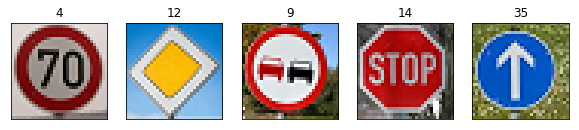

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from PIL import Image as PImage

def load_example(label_num):
    image_name = 'ex' + str(label_num) + '.bmp'
    img = PImage.open(examples_path + image_name)
    return img

examples_ext = '.bmp'

image_names_0 = []
image_labels_0 = []

# Search for *.bmp in /examples
for f in os.listdir(examples_path):
    file, ext = os.path.splitext(f)
    
    if ext.lower() == examples_ext and \
       file[:2] == 'ex' and file[2] != '_':
        
        image_names_0.append(f)
        image_labels_0.append(int(file[2:]))

image_num_0 = len(image_labels_0)

# Choose 5 random images
im_count = 5
indexes = random.sample(range(0,image_num_0), im_count)
image_num = len(indexes)

image_names = []
image_labels = []

for n in indexes:
    image_names.append(image_names_0[n])
    image_labels.append(image_labels_0[n])

print('New images to classify (%d of %d randomly choosed with numeric labels on the top):' %(im_count, image_num_0))

fig = plt.figure(1, figsize=(10,2))

for num in range(image_num):
    
    ex_image = load_example( image_labels[num] )
    
    plt.subplot(1,image_num, num+1)
    plt.imshow(ex_image, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(str(image_labels[num]))


### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, saved_path + net_name)
    
    Predicts = [False,False,False,False,False]
    
    for num in range(image_num):
        # load
        ex_image = np.array(load_example(image_labels[num]), dtype=np.uint8)

        # normalize as to training
        ex_image_n = normalize_image(ex_image)

        label = image_labels[num]

        #validation_accuracy = evaluate([ex_image], [label])
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()

        cp = sess.run(correct_prediction, feed_dict={x: [ex_image_n], y: [label], keep_prob: 1.})
        Predicts[num] = cp[0]

print()

print('Images prediction: ', Predicts)
print()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./TrafficSign/TrafficSign

Images prediction:  [False, True, True, True, True]



### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

new_accuracy = sum(Predicts)/len(Predicts)

print("New images accuracy = {:.1f}".format(new_accuracy))
print()

New images accuracy = 0.8



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

INFO:tensorflow:Restoring parameters from ./TrafficSign/TrafficSign


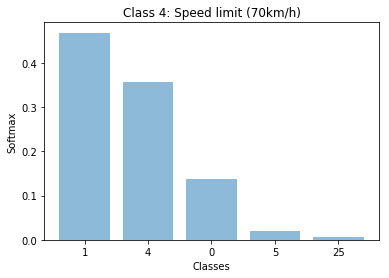

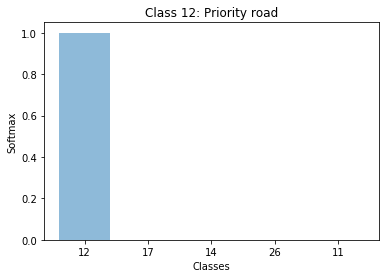

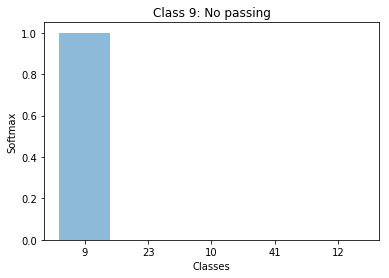

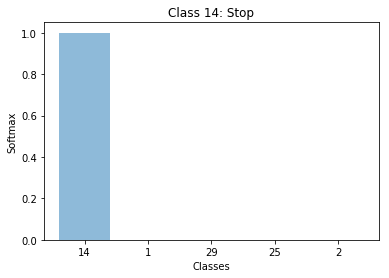

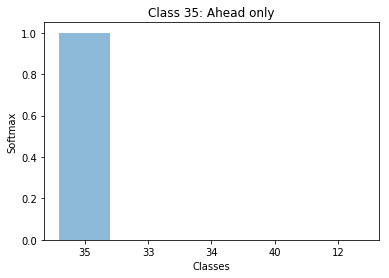

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

prob_num = 5

softmax_all = tf.nn.softmax(logits)
softmax_5 = tf.nn.top_k(softmax_all, k=prob_num)

test_images = []
test_labels = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, saved_path + net_name)
    
    for num in range(image_num):
        # load
        ex_image = np.array(load_example(image_labels[num]), dtype=np.uint8)

        # normalize as to training
        ex_image_n = normalize_image(ex_image)
        test_images.append(ex_image_n)

        label = image_labels[num]
        test_labels.append(label)

    #validation_accuracy = evaluate([ex_image], [label])
    #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    #print()
    sfm = sess.run(softmax_5, feed_dict={x: test_images, y: test_labels, keep_prob: 1.})
    probs = sfm.values
    inds = sfm.indices
    
    objects = str(test_labels)
    y_pos = np.arange(len(test_labels))
    performance = probs[0]
    
    for num in range(image_num):
        fig = plt.figure()
        ax = plt.axes
        plt.bar(np.arange(1, prob_num + 1), probs[num], align='center', alpha=0.5)
        
        plt.xticks(np.arange(1, prob_num + 1), inds[num])
        plt.xlabel('Classes')
        plt.ylabel('Softmax')
        
        Label = str(image_labels[num])
        plt.title('Class ' +  Label + ': ' + TrafficLabels[Label])

        plt.show()
        
        figname = examples_path + 'class_' + Label + '_prob.png'
        fig.savefig(figname, format='png')
        plt.pause(1)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")